 # Project description

 Description of the data:

- /datasets/hypotheses_us.csv 

Hypotheses — brief descriptions of the hypotheses

Reach — user reach, on a scale of one to ten

Impact — impact on users, on a scale of one to ten

Confidence — confidence in the hypothesis, on a scale of one to ten

Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

 Data used in the second part of the project:

- /datasets/orders_us.csv 

transactionId — order identifier

visitorId — identifier of the user who placed the order

date — of the order

revenue — from the order

group — the A/B test group that the user belongs to

- /datasets/visits_us.csv 

date — date

group — A/B test group

visits — the number of visits on the date specified in the A/B test group specified

# Plan:

1. Prioritizing Hypotheses

2. A/B Test Analysis

## Prioritizing Hypotheses

The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

The task is to:

Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
import os
import math
from scipy import stats
from cmath import sqrt
import plotly.express as px

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')

In [3]:
pd.options.display.max_colwidth = 210

In [4]:
hypotheses

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. This will bring 30% more users;3;10;8;6
1,Launch your own delivery service. This will shorten delivery time;2;5;4;10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size;8;3;7;3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly;8;3;3;8
4,Change the background color on the main page. This will increase user engagement;3;1;1;1
5,Add a customer review page. This will increase the number of orders;3;2;2;3
6,Show banners with current offers and sales on the main page. This will boost conversion;5;3;8;3
7,Add a subscription form to all the main pages. This will help you compile a mailing list;10;7;8;5
8,Launch a promotion that gives users discounts on their birthdays;1;9;9;5


In [5]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


In [6]:
hypotheses['Hypothesis;Reach;Impact;Confidence;Effort'] = hypotheses['Hypothesis;Reach;Impact;Confidence;Effort'].astype('str')
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


With iloc function open what is hiding in the row.

In [7]:
rows = []
for j in range(0,9):
    rows.append(hypotheses.iloc[j,0])
rows

['Add two new channels for attracting traffic. This will bring 30% more users;3;10;8;6',
 'Launch your own delivery service. This will shorten delivery time;2;5;4;10',
 "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size;8;3;7;3",
 'Change the category structure. This will increase conversion since users will find the products they want more quickly;8;3;3;8',
 'Change the background color on the main page. This will increase user engagement;3;1;1;1',
 'Add a customer review page. This will increase the number of orders;3;2;2;3',
 'Show banners with current offers and sales on the main page. This will boost conversion;5;3;8;3',
 'Add a subscription form to all the main pages. This will help you compile a mailing list;10;7;8;5',
 'Launch a promotion that gives users discounts on their birthdays;1;9;9;5']

Let's make from hypotheses new table.

In [8]:
lst = []
for j in range(len(rows)):
    tmp_row = rows[j].split(';')
    lst.append(tmp_row)
    
columns = hypotheses.columns[0].split(';')
hyp = pd.DataFrame(columns=columns, data=lst)
hyp

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [9]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      object
 2   Impact      9 non-null      object
 3   Confidence  9 non-null      object
 4   Effort      9 non-null      object
dtypes: object(5)
memory usage: 488.0+ bytes


In [10]:
hyp['Reach'] = hyp['Reach'].astype(int)
hyp['Impact'] = hyp['Impact'].astype(int)
hyp['Confidence'] = hyp['Confidence'].astype(int)
hyp['Effort'] = hyp['Effort'].astype(int)

In [11]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [12]:
hyp['ICE'] = (hyp['Impact'] * hyp['Confidence'] / hyp['Effort'])
hyp['ICE'] = hyp['ICE']. round()
hyp.sort_values('ICE',ascending=False,inplace=True)
hyp

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0


Hypothesis 8 and 0 are on top. Let's count RICE.

### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [13]:
hyp['RICE'] = hyp['Reach'] * hyp['Impact'] * hyp['Confidence'] / hyp['Effort']
hyp.sort_values('RICE',ascending=False,inplace=True)
hyp

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0


In the RICE framework 7 and 2 hypotheses are on the top. 

### Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

Because in RICe framework we use Reach(Reach — how many users will be affected by the update you want to introduce), hupotheses 7 is on the first place. The gap with the ICE hypothesis is quite large, but I think it would be more priority to consider the 7th hypothesis.

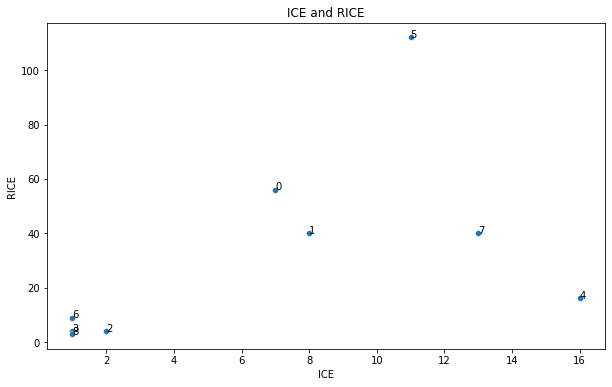

In [14]:
plt.figure(figsize=(10,6))
plt.title('ICE and RICE')
sns.scatterplot(x=hyp['ICE'], y=hyp['RICE'])
for line in range(0,hyp.shape[0]):
    plt.text(hyp.ICE[line], 
              hyp.RICE[line], 
              hyp.index[line])
plt.show()

ICE hypotheses that should be tested first:

1. 8 - 16.0

2. 0 - 13.00

3. 7 - 11.00

RICE hypotheses that should be tested first:

1. 7 - 112.0

2. 2 - 56.0

3. 0 - 40.0

The first places on both tables kinda same but switched the places.

Overall on ICE and RICE framework we can see:

- 7 bumped to first place in RICE with reach of 10

- 0 dropped to the 3d place because 7 hyp goes up to 1st place

- 2 stepped up because its reach of 8.


## A/B Test Analysis 

You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.

Task:

Analyze the A/B test:

Graph cumulative revenue by group. Make conclusions and conjectures.

Graph cumulative average order size by group. Make conclusions and conjectures.

Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

Plot a scatter chart of order prices. Make conclusions and conjectures.

Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

In [15]:
orders = pd.read_csv('/datasets/orders_us.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [17]:
orders['date'] = pd.to_datetime(orders['date'], dayfirst = True)

In [18]:
orders.duplicated().sum()

0

In [19]:
visits = pd.read_csv('/datasets/visits_us.csv')
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [20]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
visits['date'] = pd.to_datetime(visits['date'], dayfirst = True)

In [22]:
visits.duplicated().sum()

0

### Graph cumulative revenue by group. Make conclusions and conjectures.

In [23]:
orders['rev_sum'] = orders['revenue'].cumsum()
orders.head()

,transactionId,visitorId,date,revenue,group,rev_sum
0,3667963787,3312258926,2019-08-15,30.4,B,30.4
1,2804400009,3642806036,2019-08-15,15.2,B,45.6
2,2961555356,4069496402,2019-08-15,10.2,A,55.8
3,3797467345,1196621759,2019-08-15,155.1,B,210.9
4,2282983706,2322279887,2019-08-15,40.5,B,251.4


Check if there are users that are found in both A and B groups.

In [24]:
orders_a = orders[orders['group'] == 'A']
orders_b = orders[orders['group'] == 'B']

In [25]:
id_a = list(orders_a['visitorId'].unique())
id_b = list(orders_b['visitorId'].unique())
id_in_both = list(set(id_a) & set(id_b))
orders_only_a = orders_a[~orders_a['visitorId'].isin(id_b)].copy()
orders_only_b = orders_b[~orders_b['visitorId'].isin(id_a)].copy()
exclusive_users = orders[~orders['visitorId'].isin(id_in_both)].copy()

In [26]:
len(orders) #number of total orders

1197

In [27]:
len(orders_only_a) #number users from A group

468

In [28]:
len(orders_only_b) #number users from B group

548

In [29]:
len(id_in_both) #number of people in both groups

58

In [30]:
len(exclusive_users) 

1016

We can see that there are 58 users that are in A and B groups. For A/B Test we need clear data.

In [31]:
len(orders[orders['visitorId'].isin(id_in_both)])

181

In [32]:
len(orders[orders['visitorId'].isin(id_in_both)]) / len(id_in_both)

3.1206896551724137

About 3 purchases did abnormal user.

In [33]:
orders = orders[~orders['visitorId'].isin(id_in_both)]
orders.group.value_counts()

B    548
A    468
Name: group, dtype: int64

In [34]:
orders_a = orders[orders['group'] == 'A']
orders_b = orders[orders['group'] == 'B']

In [35]:
orders_a.head()

,transactionId,visitorId,date,revenue,group,rev_sum
7,2626614568,78758296,2019-08-15,20.1,A,337.1
8,1576988021,295230930,2019-08-15,215.9,A,553.0
10,3649131742,879864040,2019-08-15,65.7,A,649.2
12,2809384911,3213223594,2019-08-15,115.4,A,834.8
14,3859315276,1565034404,2019-08-15,170.9,A,1191.1


In [36]:
orders_b.head()

,transactionId,visitorId,date,revenue,group,rev_sum
0,3667963787,3312258926,2019-08-15,30.4,B,30.4
1,2804400009,3642806036,2019-08-15,15.2,B,45.6
3,3797467345,1196621759,2019-08-15,155.1,B,210.9
4,2282983706,2322279887,2019-08-15,40.5,B,251.4
5,182168103,935554773,2019-08-15,35.0,B,286.4


In [37]:
orders['date'].describe(datetime_is_numeric=True)

count                             1016
mean     2019-08-15 07:47:42.992125952
min                2019-08-01 00:00:00
25%                2019-08-07 00:00:00
50%                2019-08-15 00:00:00
75%                2019-08-23 00:00:00
max                2019-08-31 00:00:00
Name: date, dtype: object

Date range from 1st to 31 of october.

In [38]:
orders_a_revsum = orders_a.groupby('date')['revenue'].sum().cumsum().reset_index()
orders_a_revsum.columns = ['date','rev_sum']
orders_b_revsum = orders_b.groupby('date')['revenue'].sum().cumsum().reset_index()
orders_b_revsum.columns = ['date','rev_sum']

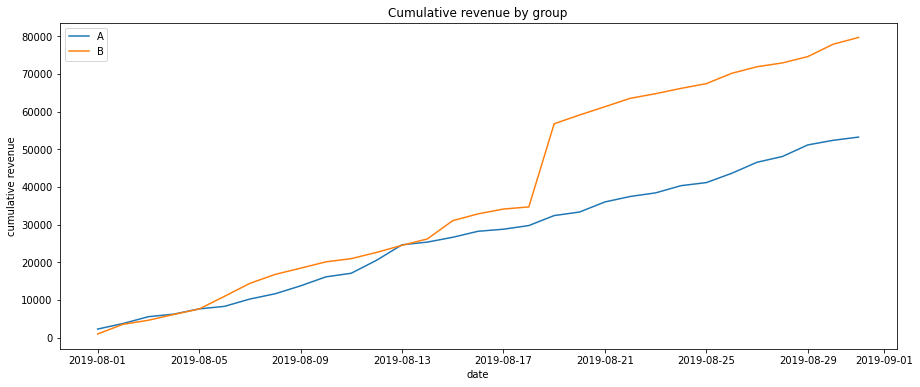

In [39]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(orders_a_revsum['date'], orders_a_revsum['rev_sum'], label='A')
plt.plot(orders_b_revsum['date'], orders_b_revsum['rev_sum'], label='B')
plt.title('Cumulative revenue by group')
plt.xlabel('date')
plt.ylabel('cumulative revenue')
plt.legend()
plt.show()

We can see that first days boh groups are about the same cumulative revenue. But after 08.13 the difference betweem them become bigger. B group is getting further away from the A, so that's the sign the hypothesis is true.

### Graph cumulative average order size by group. Make conclusions and conjectures.

In [40]:
orders_a_size = orders_a.groupby('date')['revenue'].count().cumsum().reset_index()
orders_a_size.columns = ['date','count']
orders_b_size = orders_b.groupby('date')['revenue'].count().cumsum().reset_index()
orders_b_size.columns = ['date','count']
a = orders_a_revsum.merge(orders_a_size,on='date')
a['cum_av']=a['rev_sum']/a['count']
b = orders_b_revsum.merge(orders_b_size,on='date')
b['cum_av']=b['rev_sum']/b['count']

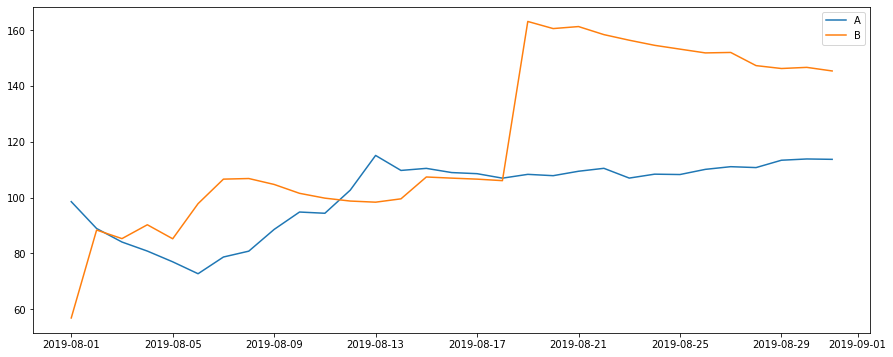

In [41]:
plt.plot(a['date'], a['cum_av'], label='A')
plt.plot(b['date'], b['cum_av'], label='B')
plt.legend()
plt.show()

The first half we dont see big difference but after 08.17 we are seeing a big jump in results of B test. Interesting that finally B test is going down and A test up. But still B is bigger.

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [42]:
ab = a.merge(b, on = 'date')
ab.head()

,date,rev_sum_x,count_x,cum_av_x,rev_sum_y,count_y,cum_av_y
0,2019-08-01,2266.6,23,98.547826,967.2,17,56.894118
1,2019-08-02,3734.9,42,88.926190,3535.3,40,88.382500
2,2019-08-03,5550.1,66,84.092424,4606.9,54,85.312963
3,2019-08-04,6225.6,77,80.851948,6138.5,68,90.272059
4,2019-08-05,7623.6,99,77.006061,7587.8,89,85.256180


In [43]:
ab['rel_dif'] = ab['cum_av_y']/ab['cum_av_x']-1
ab.head()

,date,rev_sum_x,count_x,cum_av_x,rev_sum_y,count_y,cum_av_y,rel_dif
0,2019-08-01,2266.6,23,98.547826,967.2,17,56.894118,-0.422675
1,2019-08-02,3734.9,42,88.926190,3535.3,40,88.382500,-0.006114
2,2019-08-03,5550.1,66,84.092424,4606.9,54,85.312963,0.014514
3,2019-08-04,6225.6,77,80.851948,6138.5,68,90.272059,0.116511
4,2019-08-05,7623.6,99,77.006061,7587.8,89,85.256180,0.107136


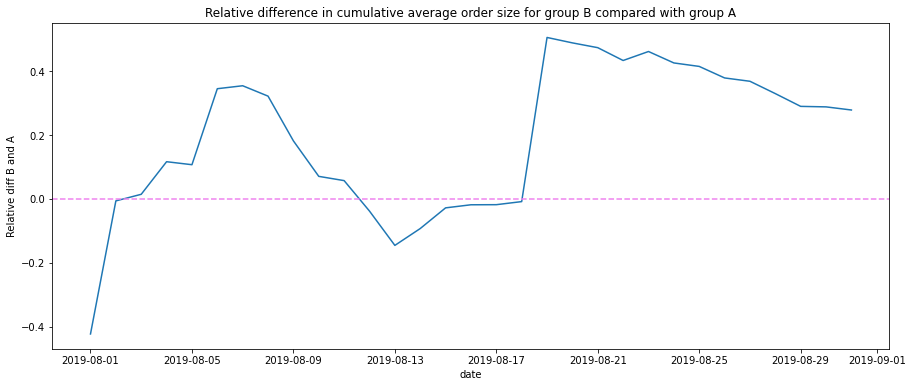

In [44]:
plt.plot(ab['date'], ab['rel_dif'])
plt.title('Relative difference in cumulative average order size for group B compared with group A')
plt.xlabel('date')
plt.ylabel('Relative diff B and A')
plt.axhline(y=0, color='violet', linestyle='--') 
plt.show()

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [45]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [46]:
visits_a = visits[visits['group'] == 'A']
visits_a.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [47]:
visits_b = visits[visits['group'] == 'B']
visits_b.head()

,date,group,visits
31,2019-08-01,B,713
32,2019-08-02,B,581
33,2019-08-03,B,509
34,2019-08-04,B,770
35,2019-08-05,B,707


In [48]:
orders_a.head()

,transactionId,visitorId,date,revenue,group,rev_sum
7,2626614568,78758296,2019-08-15,20.1,A,337.1
8,1576988021,295230930,2019-08-15,215.9,A,553.0
10,3649131742,879864040,2019-08-15,65.7,A,649.2
12,2809384911,3213223594,2019-08-15,115.4,A,834.8
14,3859315276,1565034404,2019-08-15,170.9,A,1191.1


In [49]:
orders_a_per_day = orders_a.groupby('date')['revenue'].count().reset_index()
orders_a_per_day.columns = ['date', 'orders']
orders_b_per_day = orders_b.groupby('date')['revenue'].count().reset_index()
orders_b_per_day.columns = ['date', 'orders']

In [50]:
conversion_a = visits_a.merge(orders_a_per_day, on = 'date')
conversion_b = visits_b.merge(orders_b_per_day, on ='date')

In [51]:
conversion_a['conversion'] = conversion_a['orders'] / conversion_a['visits']
conversion_a.head()

,date,group,visits,orders,conversion
0,2019-08-01,A,719,23,0.031989
1,2019-08-02,A,619,19,0.030695
2,2019-08-03,A,507,24,0.047337
3,2019-08-04,A,717,11,0.015342
4,2019-08-05,A,756,22,0.029101


In [52]:
conversion_b['conversion'] = conversion_b['orders'] / conversion_b['visits']
conversion_b.head()

,date,group,visits,orders,conversion
0,2019-08-01,B,713,17,0.023843
1,2019-08-02,B,581,23,0.039587
2,2019-08-03,B,509,14,0.027505
3,2019-08-04,B,770,14,0.018182
4,2019-08-05,B,707,21,0.029703


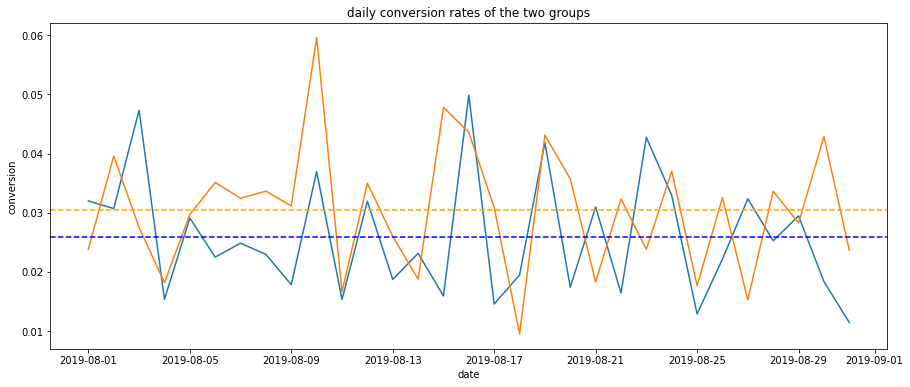

In [53]:
plt.plot(conversion_a['date'], conversion_a['conversion'], label='A')
plt.plot(conversion_b['date'], conversion_b['conversion'], label='B')
plt.axhline(y=conversion_a['conversion'].mean(), color='blue', linestyle='--')
plt.axhline(y=conversion_b['conversion'].mean(), color='orange', linestyle='--')
plt.title('daily conversion rates of the two groups')
plt.xlabel('date')
plt.ylabel('conversion')
plt.show()


In [54]:
orders_agg = exclusive_users.groupby(['date','group']).agg(
    {'transactionId' : pd.Series.nunique,
     'visitorId' : pd.Series.nunique,
     'revenue' : 'sum'}).sort_values(
    by=['date','group']).reset_index()

In [55]:
dates_groups = orders[['date', 'group']].drop_duplicates()
visitors_agg = dates_groups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1
)

In [56]:
orders_agg=orders_agg.sort_values(by=['date','group'])
visitors_agg=visitors_agg.sort_values(by=['date','group'])

In [57]:
cumulative_data = orders_agg.merge(
   visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.head()

,date,group,transactionId,visitorId,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,19,18,1468.3,1338
3,2019-08-02,B,23,22,2568.1,1294
4,2019-08-03,A,24,24,1815.2,1845


In [58]:
cumulative_data['conversion'] = cumulative_data['transactionId'] / cumulative_data['visits']
cumulative_data.head()

,date,group,transactionId,visitorId,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,19,18,1468.3,1338,0.014200
3,2019-08-02,B,23,22,2568.1,1294,0.017774
4,2019-08-03,A,24,24,1815.2,1845,0.013008


In [59]:
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']

cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

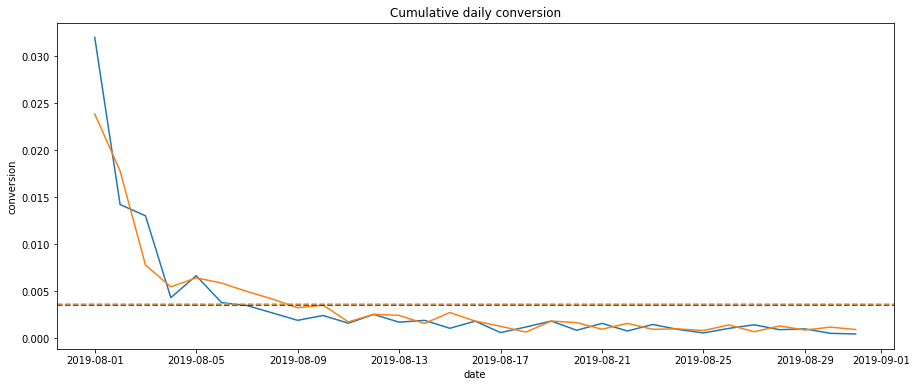

In [60]:
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.axhline(y=cumulative_data_a['conversion'].mean(), color='blue', linestyle='--')
plt.axhline(y=cumulative_data_b['conversion'].mean(), color='orange', linestyle='--')
plt.title('Cumulative daily conversion')
plt.xlabel('date')
plt.ylabel('conversion')
plt.show()

In [61]:
orders

,transactionId,visitorId,date,revenue,group,rev_sum
0,3667963787,3312258926,2019-08-15,30.4,B,30.4
1,2804400009,3642806036,2019-08-15,15.2,B,45.6
3,3797467345,1196621759,2019-08-15,155.1,B,210.9
4,2282983706,2322279887,2019-08-15,40.5,B,251.4
5,182168103,935554773,2019-08-15,35.0,B,286.4
...,...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B,153953.7
1192,2662137336,3733762160,2019-08-14,100.8,B,154054.5
1193,2203539145,370388673,2019-08-14,50.1,A,154104.6
1194,1807773912,573423106,2019-08-14,165.3,A,154269.9


In [62]:
#overall conversion A
conversion_a['orders'].sum()/conversion_a['visits'].sum()

0.02497865072587532

In [63]:
#overall conversion B
conversion_b['orders'].sum()/conversion_b['visits'].sum()

0.02897018397124128

Conversion varies between 1% and 6%. But conversion of B is higher.

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

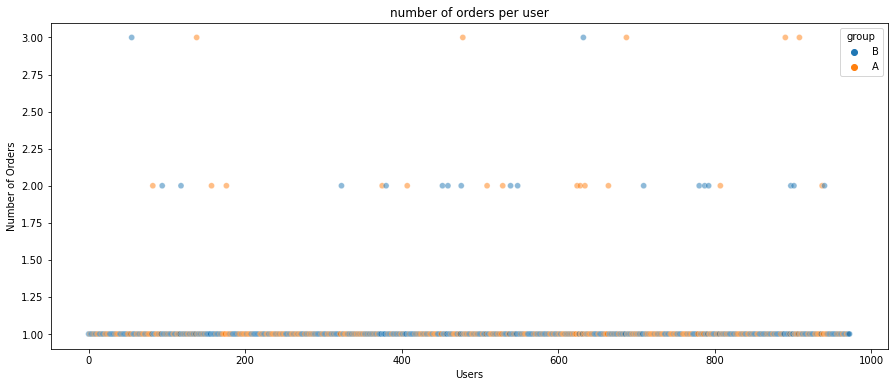

In [64]:
orders_per_user = orders.groupby(['visitorId','group'])['revenue'].count().reset_index().reset_index()
sns.scatterplot(x = 'index', y = 'revenue', data = orders_per_user, hue = 'group',alpha=.5)
plt.title('number of orders per user')
plt.xlabel('Users')
plt.ylabel('Number of Orders')
plt.show()


Mostly people do only one order.

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [65]:
orders_per_user.head()

,index,visitorId,group,revenue
0,0,5114589,B,1
1,1,6958315,B,1
2,2,11685486,A,1
3,3,39475350,B,1
4,4,47206413,B,1


In [66]:
orders_per_user['revenue'].value_counts()

1    937
2     29
3      7
Name: revenue, dtype: int64

In [67]:
print('95th percentile -',orders_per_user.quantile(.95))
print('99th percentile -',orders_per_user.quantile(.99))

95th percentile - index        9.234000e+02
visitorId    4.029952e+09
revenue      1.000000e+00
Name: 0.95, dtype: float64
99th percentile - index        9.622800e+02
visitorId    4.233005e+09
revenue      2.000000e+00
Name: 0.99, dtype: float64


### Plot a scatter chart of order prices. Make conclusions and conjectures.

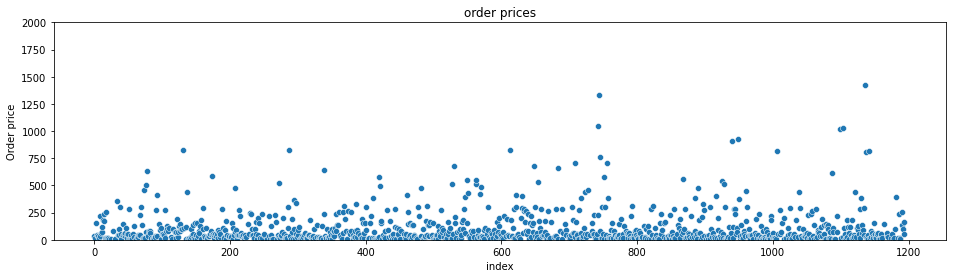

In [68]:
fig = plt.figure(figsize=(16,4))
plt.subplot()
plt.title('order prices')
plt.xlabel('index')
plt.ylabel('Order price')
plt.ylim(0, 2000)
sns.scatterplot(data = orders.reset_index(), x = 'index', y = 'revenue')

plt.show()

A lot of orders under 250$.

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [69]:
print('95th percentile -',orders['revenue'].quantile(.95))
print('99th percentile -',orders['revenue'].quantile(.99))

95th percentile - 414.275
99th percentile - 830.3


In [70]:
orders.head()

,transactionId,visitorId,date,revenue,group,rev_sum
0,3667963787,3312258926,2019-08-15,30.4,B,30.4
1,2804400009,3642806036,2019-08-15,15.2,B,45.6
3,3797467345,1196621759,2019-08-15,155.1,B,210.9
4,2282983706,2322279887,2019-08-15,40.5,B,251.4
5,182168103,935554773,2019-08-15,35.0,B,286.4


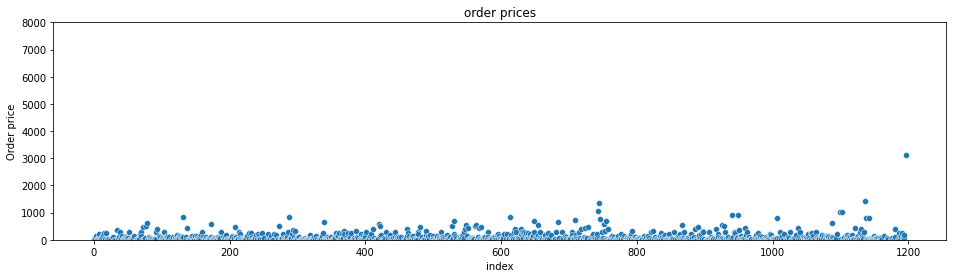

In [71]:
fig = plt.figure(figsize=(16,4))
plt.subplot()
plt.title('order prices')
plt.xlabel('index')
plt.ylabel('Order price')
plt.ylim(0, 8000)
sns.scatterplot(data = orders.reset_index(), x = 'index', y = 'revenue')

plt.show()

Upper then 400 the data is anomaly.

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

#### Total conversion check

In [72]:
trials_a=conversion_a['visits'].sum()
print("Trials:",trials_a)
successes_a=conversion_a['orders'].sum()
print("Successes:",successes_a)

Trials: 18736
Successes: 468


In [73]:
trials_b=conversion_b['visits'].sum()
print("Trials:",trials_b)
successes_b=conversion_b['orders'].sum()
print("Successes:",successes_b)

Trials: 18916
Successes: 548


In [74]:
def check_hypothesis(successes1,trials1, successes2,trials2, alpha=0.05):
    successes1 = successes_a
    trials1 = trials_a
    successes2 = successes_b
    trials2 = trials_b
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)

  
    difference = p1 - p2
    
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

  
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')


H0 - difference in average-check distributions between A and B are statistically insignificant

H1 - difference in average-check distributions between A and B are statistically significant

In [75]:
check_hypothesis(trials_a,successes_a, trials_b,successes_b, alpha=0.05)

p-value:  0.016851380434703023
Reject H0


Can you help me why I have error hhere? I found that it can be because of math.sqrt() function so we need to do "We use an if statement to check if the number the user inserts into the program is equal to or greater than zero. If the number meets this criterion, the contents of the if statement run. Otherwise, the else statement executes, presenting us with a message that we have inserted an invalid number."  That I did but still had a problem. Also I found that we can use from cmath import sqrt that also didnt help

#### Average daily conversion

In [76]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')

H0 - difference in average-check distributions between A and B are statistically insignificant

H1 - difference in average-check distributions between A and B are statistically significant

In [77]:
testing_average(conversion_a['conversion'],conversion_b['conversion'],alpha=0.05)

0.09573715593918651
Fail to Reject H0


### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [78]:
print("A mean revenue -",orders_a['revenue'].mean())
print("B mean revenue -",orders_b['revenue'].mean())

A mean revenue - 113.70085470085469
B mean revenue - 145.34890510948907


B group has bigger average check.

In [79]:
rev_a_per_day = orders_a.groupby('date')['revenue'].sum().reset_index()
average_a = rev_a_per_day.merge(orders_a_per_day,on='date')
average_a['average_order_size'] = average_a['revenue']/average_a['orders']

rev_b_per_day = orders_b.groupby('date')['revenue'].sum().reset_index()
average_b = rev_b_per_day.merge(orders_b_per_day,on='date')
average_b['average_order_size'] = average_b['revenue']/average_b['orders']

print("A mean average check -",average_a['average_order_size'].mean())
print("B mean average check -",average_b['average_order_size'].mean())

A mean average check - 115.5124717608274
B mean average check - 138.3711696835165


Still B average check is bigger

In [80]:
testing_average(average_a['average_order_size'],average_b['average_order_size'],alpha=0.05)

0.9550914317372012
Fail to Reject H0


### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

We will filter everyone who made more than 1 order and spent more then 400 $. Sounds creepy

In [81]:
users_new = orders.groupby('visitorId')['revenue'].count().reset_index()
users_new = users_new[users_new['revenue'] != np.percentile(orders_per_user['revenue'], 95)]
users_new.revenue.sum()

79

In [82]:
orders_new = orders[~orders['visitorId'].isin(users_new['visitorId'])]
orders_new.head()

,transactionId,visitorId,date,revenue,group,rev_sum
0,3667963787,3312258926,2019-08-15,30.4,B,30.4
1,2804400009,3642806036,2019-08-15,15.2,B,45.6
3,3797467345,1196621759,2019-08-15,155.1,B,210.9
4,2282983706,2322279887,2019-08-15,40.5,B,251.4
5,182168103,935554773,2019-08-15,35.0,B,286.4


In [83]:
big_orders = orders_new[orders_new['revenue'] > np.percentile(orders['revenue'], 95)]
len(big_orders)
orders_new = orders_new[~orders_new['transactionId'].isin(big_orders['transactionId'])]
orders_new.head()


,transactionId,visitorId,date,revenue,group,rev_sum
0,3667963787,3312258926,2019-08-15,30.4,B,30.4
1,2804400009,3642806036,2019-08-15,15.2,B,45.6
3,3797467345,1196621759,2019-08-15,155.1,B,210.9
4,2282983706,2322279887,2019-08-15,40.5,B,251.4
5,182168103,935554773,2019-08-15,35.0,B,286.4


In [84]:
#make new tables to count
orders_a_new = orders_new[orders_new['group'] == 'A']
orders_b_new = orders_new[orders_new['group'] == 'B']
orders_a_per_day_new = orders_a_new.groupby('date')['revenue'].count().reset_index()
orders_a_per_day_new.columns = ['date','orders']
orders_b_per_day_new = orders_b_new.groupby('date')['revenue'].count().reset_index()
orders_b_per_day_new.columns = ['date','orders']

conversion_a_new  = visits_a.merge(orders_a_per_day_new,on='date')
conversion_b_new  = visits_b.merge(orders_b_per_day_new,on='date')
conversion_a_new['conversion'] = conversion_a_new['orders']/conversion_a_new['visits']
conversion_b_new['conversion'] = conversion_b_new['orders']/conversion_b_new['visits']

#### Total Conversion

In [85]:
successes_a_new = conversion_a_new.orders.sum()
successes_b_new = conversion_b_new.orders.sum()
trials_a_new = conversion_a_new.visits.sum()
trials_b_new = conversion_b_new.visits.sum()

In [86]:
check_hypothesis(successes_a_new,trials_a_new, successes_b_new,trials_b_new, alpha=0.05)

p-value:  0.016851380434703023
Reject H0


#### Daily Conversion

In [87]:
testing_average(conversion_a_new['conversion'],conversion_b_new['conversion'],alpha=0.05)

0.043349564671668755
Reject H0


### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [88]:
print("A mean revenue -",orders_a_new.revenue.mean())
print("B mean revenue -",orders_b_new.revenue.mean())

A mean revenue - 80.74679802955666
B mean revenue - 78.05821205821206


In [89]:
rev_a_per_day_new = orders_a_new.groupby('date')['revenue'].sum().reset_index()
average_a_new = rev_a_per_day_new.merge(orders_a_per_day_new,on='date')
average_a_new['average_order_size'] = average_a_new['revenue']/average_a_new['orders']
rev_b_per_day_new = orders_b_new.groupby('date')['revenue'].sum().reset_index()
average_b_new = rev_b_per_day_new.merge(orders_b_per_day_new,on='date')
average_b_new['average_order_size'] = average_b_new['revenue']/average_b_new['orders']

print("A's mean average check -",average_a_new['average_order_size'].mean())
print("B's mean average check -",average_b_new['average_order_size'].mean())

A's mean average check - 83.34409768573194
B's mean average check - 79.6324778133498


In [90]:
testing_average(average_a_new['average_order_size'],average_b_new['average_order_size'],alpha=0.05)

0.5868740020824459
Fail to Reject H0


H0 is not rejected again.

### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

 Conclusion:
Conversion Rate results showed B's in favor. The overall conversion of B is bigger than A's conversion.

Regarding to A/B Test I recomend to stop the test:

There is a statistically difference in conversion between the groups that is occure by using raw data or the filtered data. Mean of conversion rate B group is higher than conversion rate for group A.

We cab see that B group is leader.